<a href="https://colab.research.google.com/github/JetteKA/BigData/blob/master/cnn_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [0]:
n_classes = 10

epochs = 15
batch_size = 50

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [0]:
def label_manually(n, x_train, y_train):
    '''Human powered labeling (actually copying from the prelabeled MNIST dataset).'''

    x_labelled = x_train[:n]
    y_labelled = y_train[:n]

    return x_labelled, y_labelled


In [0]:
def reshape_x_for_cnn(data, img_rows=img_rows, img_cols=img_cols):


  data = data.reshape(data.shape[0], img_rows, img_cols, 1)
  data = data.astype('float32')
  data /=255

  return data

def reshape_y_for_cnn(data, n_classes=n_classes):
  return keras.utils.to_categorical(data, n_classes)


In [0]:
x_test = reshape_x_for_cnn(x_test)

y_test = reshape_y_for_cnn(y_test)

In [0]:
def create_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])
  return model

In [0]:

train_acc = []
test_acc = []
train_loss = []
test_loss = []
num_labels = []

In [0]:
def train(model, x_labelled, y_labelled):


  x_label_cnn = reshape_x_for_cnn(x_labelled)


  y_label_cnn = reshape_y_for_cnn(y_labelled)

  model.fit(x_label_cnn, y_label_cnn,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1)
  test_score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', test_score[0])
  print('Test accuracy:', test_score[1])
  test_loss.append(test_score[0])
  test_acc.append(test_score[1])

  train_score = model.evaluate(x_label_cnn, y_label_cnn, verbose=0)
  print('Train loss:', train_score[0])
  print('Train accuracy:', train_score[1])
  train_loss.append(train_score[0])
  train_acc.append(train_score[1])

  num_labels.append(x_labelled.shape[0])

  
  


In [20]:
for x in range(50, 10050, 50):
    print(x)
    x_labelled, y_labelled = label_manually(x, x_train, y_train)
    train(create_model(), x_labelled, y_labelled)

Streaming output truncated to the last 5000 lines.
2900/2900 [==============================] - 0s 124us/step - loss: 0.5683 - acc: 0.8003
Epoch 4/15
2900/2900 [==============================] - 0s 124us/step - loss: 0.5191 - acc: 0.8214
Epoch 5/15
2900/2900 [==============================] - 0s 121us/step - loss: 0.4570 - acc: 0.8414
Epoch 6/15
2900/2900 [==============================] - 0s 126us/step - loss: 0.4017 - acc: 0.8576
Epoch 7/15
2900/2900 [==============================] - 0s 128us/step - loss: 0.3726 - acc: 0.8666
Epoch 8/15
2900/2900 [==============================] - 0s 122us/step - loss: 0.3572 - acc: 0.8683
Epoch 9/15
2900/2900 [==============================] - 0s 124us/step - loss: 0.3312 - acc: 0.8838
Epoch 10/15
2900/2900 [==============================] - 0s 119us/step - loss: 0.3145 - acc: 0.8879
Epoch 11/15
2900/2900 [==============================] - 0s 124us/step - loss: 0.2766 - acc: 0.9014
Epoch 12/15
2900/2900 [==============================] - 0s 129us/s

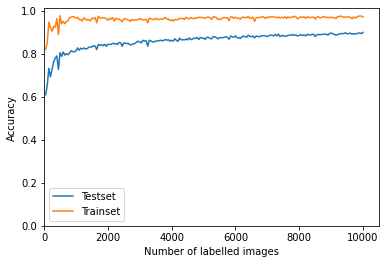

In [21]:
plt.plot(num_labels, test_acc, label="Testset")
plt.plot(num_labels, train_acc, label="Trainset")
plt.xlabel('Number of labelled images')
plt.ylabel("Accuracy")
plt.axis(ymin=0, ymax=1.01, xmin=0)
plt.legend()
plt.savefig("drive/My Drive/BD/CNN_single")

In [0]:

MyFile=open('drive/My Drive/BD/CNN_single_acc.txt','w')

for element in test_acc:
     MyFile.write(str(element))
     MyFile.write('\n')
MyFile.close()

In [0]:

MyFile=open('drive/My Drive/BD/CNN_single_acc_train.txt','w')

for element in train_acc:
     MyFile.write(str(element))
     MyFile.write('\n')
MyFile.close()

In [0]:

MyFile=open('drive/My Drive/BD/CNN_single_num_labels.txt','w')

for element in num_labels:
     MyFile.write(str(element))
     MyFile.write('\n')
MyFile.close()